### 목표변수 FAT을 예측하기 위한 파생변수를 생성해 회귀분석을 실시하여 결과 해석하고, predict method를 이용해 예측값을 구하라.

In [20]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.formula.api import ols 
from statsmodels.api import qqplot, add_constant 
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse 
from sklearn.preprocessing import scale, minmax_scale, robust_scale 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [21]:
df_raw = pd.read_csv("2BD/체질검사.csv", encoding="euc-kr")
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0


In [22]:
df_raw[['WEIGHT', 'HEIGHT']]

,WEIGHT,HEIGHT
0,363.15,72.25
1,168.00,71.25
2,177.75,68.50
3,147.75,65.75
4,219.00,64.00
...,...,...
247,207.50,70.00
248,170.75,67.50
249,162.75,66.00
250,167.75,68.50


In [23]:
for x in range(252): #단위 변경
    df_raw.loc[x:x,'WEIGHT'] = df_raw.loc[x:x,'WEIGHT'] * 0.45
    df_raw.loc[x:x,'HEIGHT'] = df_raw.loc[x:x,'HEIGHT'] * 0.0254
df_raw[['WEIGHT', 'HEIGHT']]

,WEIGHT,HEIGHT
0,163.4175,1.83515
1,75.6000,1.80975
2,79.9875,1.73990
3,66.4875,1.67005
4,98.5500,1.62560
...,...,...
247,93.3750,1.77800
248,76.8375,1.71450
249,73.2375,1.67640
250,75.4875,1.73990


In [24]:
df_raw['BMI'] = df_raw['WEIGHT'] / df_raw['HEIGHT']**2

<Axes: >

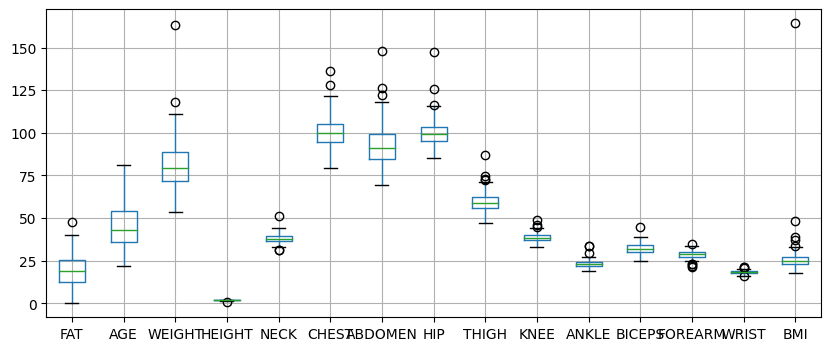

In [25]:
df_raw.boxplot(figsize = (10,4)) #이상치 확인

In [26]:
df_raw[df_raw["WEIGHT"] >= 150 ] #150 넘는 무게 값 확인

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,163.4175,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.52387


<Axes: >

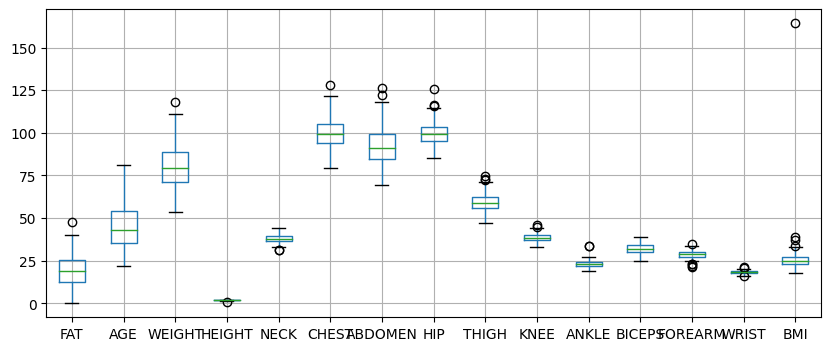

In [27]:
df_raw = df_raw[df_raw["WEIGHT"] <= 150] #150 넘는 무게 값 삭제
df_raw.boxplot(figsize = (10, 4)) 

In [28]:
df_raw[df_raw["HEIGHT"] <= 1 ] #100 넘지 않는 키 값 확인

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
78,32.9,44,92.25,0.7493,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,164.306562


<Axes: >

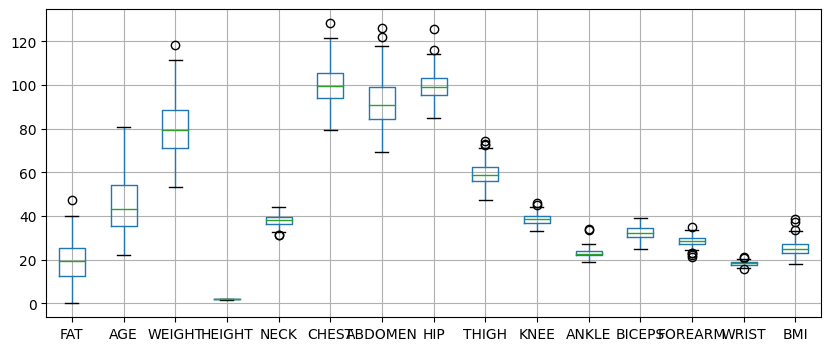

In [29]:
df_raw = df_raw[df_raw["HEIGHT"] >= 1] #100 넘지 않는 키 값 삭제
df_raw.boxplot(figsize = (10, 4)) 

In [30]:
df_raw.corr().round(3) #상관분석

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.295,0.617,-0.029,0.489,0.701,0.824,0.633,0.549,0.492,0.245,0.482,0.365,0.339,0.745
AGE,0.295,1.000,-0.016,-0.246,0.119,0.182,0.243,-0.058,-0.216,0.017,-0.110,-0.044,-0.085,0.218,0.124
WEIGHT,0.617,-0.016,1.000,0.513,0.810,0.891,0.874,0.933,0.852,0.843,0.581,0.785,0.683,0.725,0.867
HEIGHT,-0.029,-0.246,0.513,1.000,0.325,0.224,0.187,0.397,0.350,0.513,0.395,0.319,0.322,0.397,0.022
NECK,0.489,0.119,0.810,0.325,1.000,0.769,0.728,0.708,0.669,0.648,0.434,0.709,0.661,0.731,0.752
CHEST,0.701,0.182,0.891,0.224,0.769,1.000,0.910,0.825,0.708,0.698,0.447,0.707,0.599,0.644,0.911
ABDOMEN,0.824,0.243,0.874,0.187,0.728,0.910,1.000,0.861,0.737,0.710,0.407,0.656,0.530,0.602,0.914
HIP,0.633,-0.058,0.933,0.397,0.708,0.825,0.861,1.000,0.881,0.809,0.521,0.722,0.603,0.626,0.861
THIGH,0.549,-0.216,0.852,0.350,0.669,0.708,0.737,0.881,1.000,0.777,0.504,0.744,0.604,0.544,0.787
KNEE,0.492,0.017,0.843,0.513,0.648,0.698,0.710,0.809,0.777,1.000,0.585,0.654,0.579,0.656,0.679


In [31]:
#회귀모델 생성(설명변수 전체)
reg_model = smf.ols(formula = "FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     51.82
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.18e-63
Time:                        19:45:52   Log-Likelihood:                -707.13
No. Observations:                 250   AIC:                             1444.
Df Residuals:                     235   BIC:                             1497.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -106.8540     55.404     -1.929      0.0

In [32]:
#회귀모델 생성(설명변수 간 다중공선성 확인)
df_raw_x = df_raw.drop("FAT", axis=1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.829
1,AGE,2.290
12,FOREARM,2.448
13,WRIST,3.273
11,BICEPS,3.411
4,NECK,3.979
9,KNEE,4.538
8,THIGH,7.169
5,CHEST,10.950
6,ABDOMEN,12.344


In [33]:
#회귀모델 생성(설명변수 다중공선성 처리) 몸무게와 키 제외(BMI와의 다중공선성이 높기때문)
reg_model = smf.ols(formula = "FAT~AGE+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     59.44
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.81e-64
Time:                        19:46:20   Log-Likelihood:                -709.53
No. Observations:                 250   AIC:                             1445.
Df Residuals:                     237   BIC:                             1491.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      7.592      0.441      0.6

In [34]:
#다중공선성 높은 변수 제거 후 공선성 재확인
df_raw_x = df_raw.drop(["FAT","WEIGHT","HEIGHT"], axis = 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
8,ANKLE,1.760
1,AGE,2.071
10,FOREARM,2.414
11,WRIST,3.101
9,BICEPS,3.294
2,NECK,3.682
7,KNEE,4.108
6,THIGH,7.061
3,CHEST,8.839
5,HIP,9.744


In [35]:
#후진제거법 이용한 변수 선택
df_raw_y = df_raw["FAT"]
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x, df_raw_y)
selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['NECK', 'ABDOMEN', 'HIP', 'WRIST', 'BMI'], dtype='object')
Removed Variables:Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'FOREARM'], dtype='object')


In [36]:
#후진제거법 이용한 변수 선택 및 모델 생성
rfe_reg_model = smf.ols(formula = "FAT~NECK+ABDOMEN+HIP+WRIST+BMI ", data = df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.20e-68
Time:                        19:46:52   Log-Likelihood:                -716.86
No. Observations:                 250   AIC:                             1446.
Df Residuals:                     244   BIC:                             1467.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2123      7.024      0.600      0.5

In [37]:
#후진제거법에 의해 선택된 데이터
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)
df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF",inplace = True)
df_rfe_vif.round(3)

,variable,VIF
4,WRIST,2.266
1,NECK,3.186
3,HIP,4.644
2,ABDOMEN,7.021
5,BMI,7.451
0,const,664.323


<Axes: >

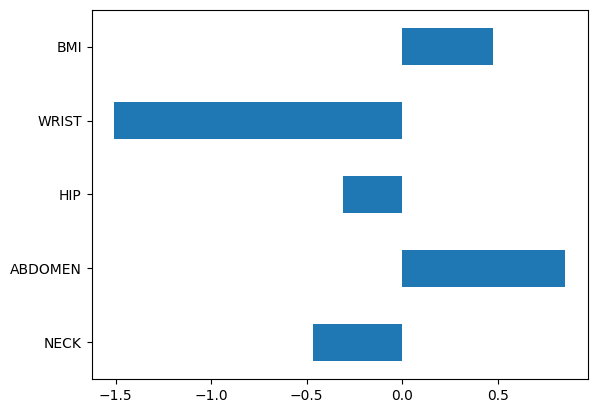

In [38]:
#변수 중요도 확인: 비표준화 회귀계수 기준
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [42]:
#표준화 회귀계수를 이용한 변수 중요도 확인
scaler = StandardScaler()
cols = df_raw_x.columns
np_scaled = scaler.fit_transform(df_raw_x) #X 스케일 변환
df_scaled = pd.DataFrame(np_scaled, columns=cols)
df_scaled["FAT"] = scaler.fit_transform(df_raw[["FAT"]]) #Y스케일 변환
reg_model_scaled = smf.ols(formula = "FAT~NECK+ABDOMEN+HIP+WRIST+BMI", data=df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.20e-68
Time:                        19:59:38   Log-Likelihood:                -188.47
No. Observations:                 250   AIC:                             388.9
Df Residuals:                     244   BIC:                             410.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.104e-16      0.033   9.43e-15      1.0

<Axes: >

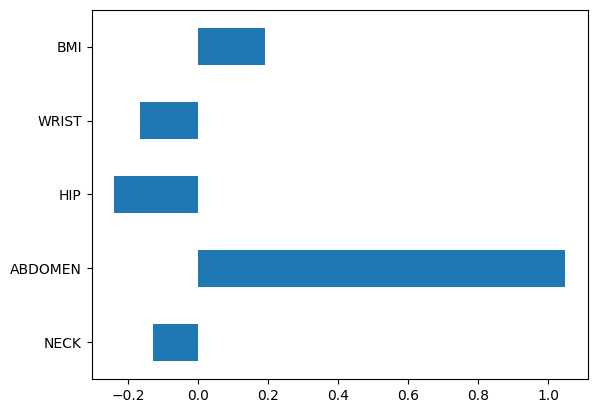

In [40]:
df_reg_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

복부 둘레가 가장 중요하다.
손목 둘레의 중요도는 줄어든 반면 엉덩이 변수의 중요도는 증가했다.
BMI의 중요도도 높다.
모델의 통계량은 변화가 없다.
결론의 설명력은 0.736이다.